In [63]:
# -- MNISTを使用したニューラルネットワーク --

import torchvision.datasets as datasets
import torchvision.transforms as transforms

data_root_mnist = "./data/mnist"
data_root_hand_digits = "./data/hand_digits"

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Lambda(lambda x: x.view(-1))
])

train_set = datasets.MNIST(
    root = data_root_mnist,
    train = True,
    download = True,
    transform = transform
)

test_set = datasets.MNIST(
    root = data_root_mnist,
    train = False,
    download = True,
    transform = transform
)

In [64]:
print("学習データ件数: ", len(train_set))
print("テストデータ件数: ", len(test_set))

学習データ件数:  60000
テストデータ件数:  10000


In [65]:
from torch.utils.data import DataLoader

batch_size = 100

train_loader = DataLoader(
    train_set, 
    batch_size = batch_size,
    shuffle = True
)

test_loader = DataLoader(
    test_set,  
    batch_size = batch_size,
    shuffle = False
)

In [66]:
import torch.nn as nn

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [67]:
import torch
import numpy as np

inputs, labels = next(iter(train_loader))

n_input = inputs[0].shape[0]
n_output = 10
n_hidden = 128

torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

net = Net2(
    n_input = n_input,
    n_output = n_output,
    n_hidden = n_hidden
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net.to(device)

leaning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=leaning_rate)
num_epochs = 50
history = np.zeros((0, 5))

In [68]:
from tqdm import tqdm

for epoch in range(num_epochs):
    n_train_acc, n_val_acc = 0, 0
    train_loss, val_loss = 0, 0
    n_train, n_val = 0, 0

    for inputs, labels in tqdm(train_loader):
        train_batch_size = len(labels)
        n_train += train_batch_size

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        predicted = torch.max(outputs, 1)[1]

        train_loss += loss.item() * train_batch_size
        n_train_acc += (predicted == labels).sum().item()

    for inputs_test, labels_test in test_loader:
      test_batch_size = len(labels_test)
      n_val += test_batch_size

      inputs_test = inputs_test.to(device)
      labels_test = labels_test.to(device)

      outputs_test = net(inputs_test)

      loss_test = criterion(outputs_test, labels_test)

      predicted_test = torch.max(outputs_test, 1)[1]

      val_loss += loss_test.item() * test_batch_size
      n_val_acc += (predicted_test == labels_test).sum().item()

    train_acc = n_train_acc / n_train
    val_acc = n_val_acc / n_val
    ave_train_loss = train_loss / n_train
    ave_val_loss = val_loss / n_val

    print (f'Epoch [{epoch + 1}/{num_epochs}], loss: {ave_train_loss:.5f} acc: {train_acc:.5f} val_loss: {ave_val_loss:.5f}, val_acc: {val_acc:.5f}')

    item = np.array([epoch + 1, ave_train_loss, train_acc, ave_val_loss, val_acc])
    history = np.vstack((history, item))

100%|██████████| 600/600 [00:33<00:00, 17.70it/s]


Epoch [1/50], loss: 1.28875 acc: 0.64895 val_loss: 0.53517, val_acc: 0.85640


100%|██████████| 600/600 [00:22<00:00, 26.67it/s]


Epoch [2/50], loss: 0.44089 acc: 0.87760 val_loss: 0.36450, val_acc: 0.89420


100%|██████████| 600/600 [00:19<00:00, 30.56it/s]


Epoch [3/50], loss: 0.35439 acc: 0.89743 val_loss: 0.32272, val_acc: 0.90630


100%|██████████| 600/600 [00:19<00:00, 30.47it/s]


Epoch [4/50], loss: 0.31842 acc: 0.90730 val_loss: 0.29009, val_acc: 0.91500


100%|██████████| 600/600 [00:20<00:00, 29.68it/s]


Epoch [5/50], loss: 0.29527 acc: 0.91352 val_loss: 0.27367, val_acc: 0.92120


100%|██████████| 600/600 [00:19<00:00, 30.01it/s]


Epoch [6/50], loss: 0.27625 acc: 0.91995 val_loss: 0.26254, val_acc: 0.92210


100%|██████████| 600/600 [00:20<00:00, 29.72it/s]


Epoch [7/50], loss: 0.26053 acc: 0.92360 val_loss: 0.24766, val_acc: 0.92830


100%|██████████| 600/600 [00:20<00:00, 29.43it/s]


Epoch [8/50], loss: 0.24608 acc: 0.92795 val_loss: 0.23461, val_acc: 0.93230


100%|██████████| 600/600 [00:19<00:00, 31.46it/s]


Epoch [9/50], loss: 0.23191 acc: 0.93257 val_loss: 0.22819, val_acc: 0.93080


100%|██████████| 600/600 [00:19<00:00, 30.70it/s]


Epoch [10/50], loss: 0.21888 acc: 0.93577 val_loss: 0.20873, val_acc: 0.93800


100%|██████████| 600/600 [00:20<00:00, 29.50it/s]


Epoch [11/50], loss: 0.20741 acc: 0.94002 val_loss: 0.20015, val_acc: 0.94190


100%|██████████| 600/600 [00:19<00:00, 30.59it/s]


Epoch [12/50], loss: 0.19649 acc: 0.94310 val_loss: 0.18953, val_acc: 0.94450


100%|██████████| 600/600 [00:20<00:00, 29.77it/s]


Epoch [13/50], loss: 0.18672 acc: 0.94558 val_loss: 0.18240, val_acc: 0.94620


100%|██████████| 600/600 [00:20<00:00, 29.59it/s]


Epoch [14/50], loss: 0.17733 acc: 0.94842 val_loss: 0.17159, val_acc: 0.94890


100%|██████████| 600/600 [00:20<00:00, 29.27it/s]


Epoch [15/50], loss: 0.16896 acc: 0.95065 val_loss: 0.16950, val_acc: 0.94970


100%|██████████| 600/600 [00:19<00:00, 30.76it/s]


Epoch [16/50], loss: 0.16080 acc: 0.95337 val_loss: 0.16231, val_acc: 0.95180


100%|██████████| 600/600 [00:19<00:00, 30.25it/s]


Epoch [17/50], loss: 0.15355 acc: 0.95570 val_loss: 0.15299, val_acc: 0.95420


100%|██████████| 600/600 [00:20<00:00, 29.50it/s]


Epoch [18/50], loss: 0.14745 acc: 0.95773 val_loss: 0.14957, val_acc: 0.95490


100%|██████████| 600/600 [00:19<00:00, 30.47it/s]


Epoch [19/50], loss: 0.14049 acc: 0.95923 val_loss: 0.14387, val_acc: 0.95630


100%|██████████| 600/600 [00:20<00:00, 29.28it/s]


Epoch [20/50], loss: 0.13457 acc: 0.96108 val_loss: 0.13976, val_acc: 0.95790


100%|██████████| 600/600 [00:19<00:00, 30.23it/s]


Epoch [21/50], loss: 0.12935 acc: 0.96265 val_loss: 0.13491, val_acc: 0.95960


100%|██████████| 600/600 [00:19<00:00, 30.42it/s]


Epoch [22/50], loss: 0.12429 acc: 0.96402 val_loss: 0.12967, val_acc: 0.96080


100%|██████████| 600/600 [00:19<00:00, 30.52it/s]


Epoch [23/50], loss: 0.11933 acc: 0.96598 val_loss: 0.12953, val_acc: 0.96090


100%|██████████| 600/600 [00:19<00:00, 30.73it/s]


Epoch [24/50], loss: 0.11514 acc: 0.96663 val_loss: 0.12106, val_acc: 0.96200


100%|██████████| 600/600 [00:19<00:00, 30.40it/s]


Epoch [25/50], loss: 0.11078 acc: 0.96830 val_loss: 0.11658, val_acc: 0.96330


100%|██████████| 600/600 [00:20<00:00, 29.15it/s]


Epoch [26/50], loss: 0.10656 acc: 0.96923 val_loss: 0.11731, val_acc: 0.96380


100%|██████████| 600/600 [00:20<00:00, 29.14it/s]


Epoch [27/50], loss: 0.10297 acc: 0.97058 val_loss: 0.11258, val_acc: 0.96510


100%|██████████| 600/600 [00:37<00:00, 15.97it/s]


Epoch [28/50], loss: 0.09924 acc: 0.97160 val_loss: 0.11244, val_acc: 0.96500


100%|██████████| 600/600 [00:35<00:00, 17.03it/s]


Epoch [29/50], loss: 0.09644 acc: 0.97253 val_loss: 0.10995, val_acc: 0.96710


100%|██████████| 600/600 [00:35<00:00, 16.81it/s]


Epoch [30/50], loss: 0.09295 acc: 0.97353 val_loss: 0.10791, val_acc: 0.96630


100%|██████████| 600/600 [00:36<00:00, 16.35it/s]


Epoch [31/50], loss: 0.08978 acc: 0.97443 val_loss: 0.10391, val_acc: 0.96670


100%|██████████| 600/600 [00:31<00:00, 19.09it/s]


Epoch [32/50], loss: 0.08692 acc: 0.97552 val_loss: 0.10252, val_acc: 0.96840


100%|██████████| 600/600 [00:20<00:00, 29.36it/s]


Epoch [33/50], loss: 0.08424 acc: 0.97578 val_loss: 0.10023, val_acc: 0.96910


100%|██████████| 600/600 [00:19<00:00, 30.99it/s]


Epoch [34/50], loss: 0.08172 acc: 0.97667 val_loss: 0.09855, val_acc: 0.96960


100%|██████████| 600/600 [00:19<00:00, 31.25it/s]


Epoch [35/50], loss: 0.07907 acc: 0.97768 val_loss: 0.09863, val_acc: 0.96910


100%|██████████| 600/600 [00:18<00:00, 32.63it/s]


Epoch [36/50], loss: 0.07664 acc: 0.97828 val_loss: 0.09524, val_acc: 0.97110


100%|██████████| 600/600 [00:18<00:00, 32.39it/s]


Epoch [37/50], loss: 0.07441 acc: 0.97920 val_loss: 0.09784, val_acc: 0.96960


100%|██████████| 600/600 [00:20<00:00, 30.00it/s]


Epoch [38/50], loss: 0.07232 acc: 0.97977 val_loss: 0.09331, val_acc: 0.97050


100%|██████████| 600/600 [00:31<00:00, 18.95it/s]


Epoch [39/50], loss: 0.07042 acc: 0.98020 val_loss: 0.08992, val_acc: 0.97050


100%|██████████| 600/600 [00:30<00:00, 19.45it/s]


Epoch [40/50], loss: 0.06850 acc: 0.98105 val_loss: 0.09009, val_acc: 0.97150


100%|██████████| 600/600 [00:22<00:00, 27.23it/s]


Epoch [41/50], loss: 0.06656 acc: 0.98125 val_loss: 0.08596, val_acc: 0.97320


100%|██████████| 600/600 [00:18<00:00, 31.85it/s]


Epoch [42/50], loss: 0.06472 acc: 0.98155 val_loss: 0.08748, val_acc: 0.97310


100%|██████████| 600/600 [00:19<00:00, 31.09it/s]


Epoch [43/50], loss: 0.06253 acc: 0.98247 val_loss: 0.08663, val_acc: 0.97280


100%|██████████| 600/600 [00:18<00:00, 32.12it/s]


Epoch [44/50], loss: 0.06126 acc: 0.98228 val_loss: 0.08581, val_acc: 0.97220


100%|██████████| 600/600 [00:18<00:00, 31.97it/s]


Epoch [45/50], loss: 0.05964 acc: 0.98337 val_loss: 0.08242, val_acc: 0.97410


100%|██████████| 600/600 [00:18<00:00, 32.73it/s]


Epoch [46/50], loss: 0.05828 acc: 0.98357 val_loss: 0.08159, val_acc: 0.97440


100%|██████████| 600/600 [00:18<00:00, 32.05it/s]


Epoch [47/50], loss: 0.05665 acc: 0.98395 val_loss: 0.08276, val_acc: 0.97540


100%|██████████| 600/600 [00:19<00:00, 31.07it/s]


Epoch [48/50], loss: 0.05495 acc: 0.98407 val_loss: 0.08099, val_acc: 0.97460


100%|██████████| 600/600 [00:19<00:00, 31.47it/s]


Epoch [49/50], loss: 0.05372 acc: 0.98502 val_loss: 0.08124, val_acc: 0.97380


100%|██████████| 600/600 [00:26<00:00, 23.01it/s]


Epoch [50/50], loss: 0.05229 acc: 0.98535 val_loss: 0.07787, val_acc: 0.97620


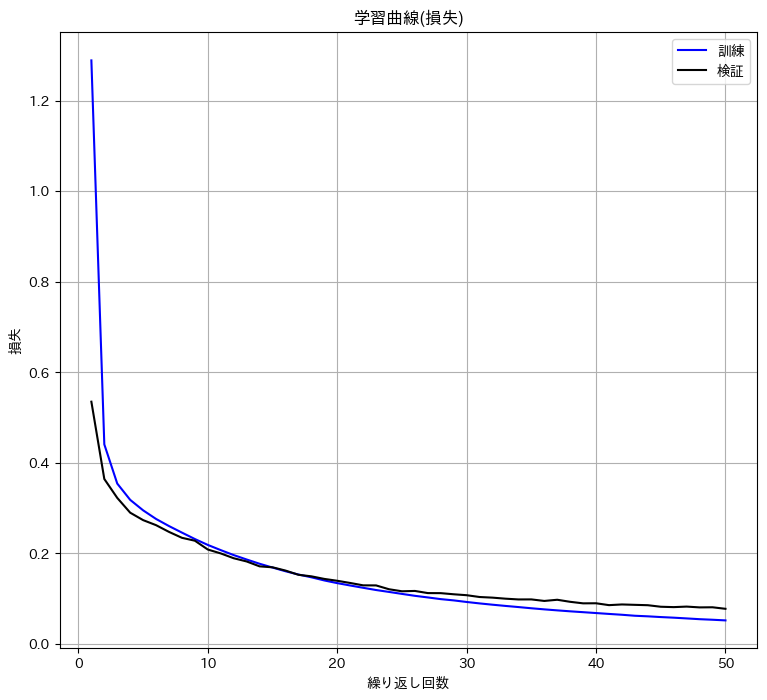

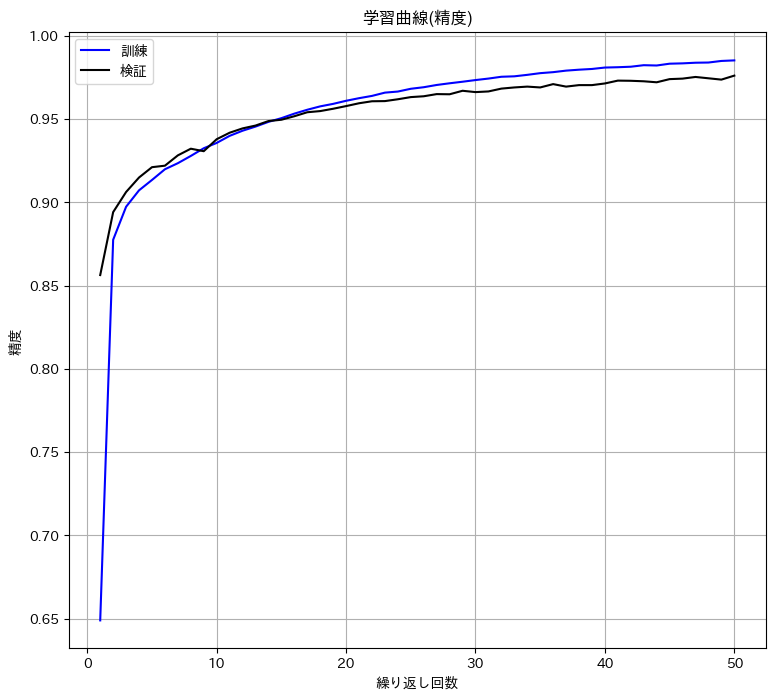

In [69]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.grid(True)
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
mnist_model_path = "./mnist_only_model.pth"
torch.save(net.state_dict(), mnist_model_path)

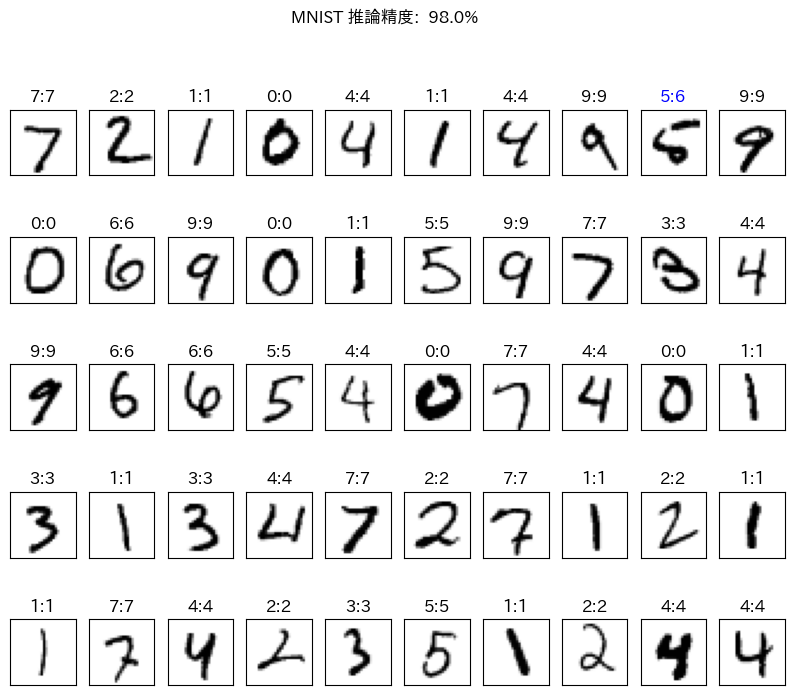

In [71]:
inputs, labels = next(iter(test_loader))

n_input = inputs[0].shape[0]
n_output = 10
n_hidden = 128

net = Net2(
    n_input=n_input,
    n_output=n_output,
    n_hidden=n_hidden
) 
net.to(device) 
state_dict = torch.load(mnist_model_path, map_location=device) 
net.load_state_dict(state_dict)
net.eval()

plt.figure(figsize=(10, 8))

with torch.no_grad():
    for images, labels in test_loader:
        break

    inputs = images.to(device)
    labels = labels.to(device)

    outputs = net(inputs)
    predicted = torch.max(outputs, 1)[1]

    total = 0
    correct = 0

    for i in range(50):
        total += 1
        ax = plt.subplot(5, 10, i + 1)

        image = images[i]
        label = labels[i].item()
        pred = predicted[i].item()

        if (pred == label):
            c = 'k'
            correct += 1
        else:
            c = 'b'

        image2 = (image + 1)/ 2

        plt.imshow(image2.reshape(28, 28),cmap='gray_r')
        ax.set_title(f'{label}:{pred}', c=c)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    accuracy = (correct / total) * 100
    plt.suptitle(f"MNIST 推論精度: {accuracy: .1f}%")

In [72]:
import shutil
import os
from glob import glob
import random

zip_root_my_hand_digits = "./my_hand_digits.zip"
data_root_my_hand_digits = "./data/my_hand_digits"
data_root_my_hand_digits_tmp = f"{data_root_my_hand_digits}/tmp"

shutil.unpack_archive(zip_root_my_hand_digits, data_root_my_hand_digits_tmp)

for n in range(10):
    no_dir = f"{data_root_my_hand_digits}/{n}"
    os.makedirs(no_dir, exist_ok=True)

my_hand_digits_images = glob(f"{data_root_my_hand_digits_tmp}/*.png")
print("画像ファイル数:", len(my_hand_digits_images))
random.seed(0)
random.shuffle(my_hand_digits_images)

for file in my_hand_digits_images:
    file_name = os.path.basename(file)
    label = file_name[0]
    dest_dir = f"{data_root_my_hand_digits}/{label}"
    shutil.move(file, f"{dest_dir}/{file_name}")

shutil.rmtree(data_root_my_hand_digits_tmp)

画像ファイル数: 50


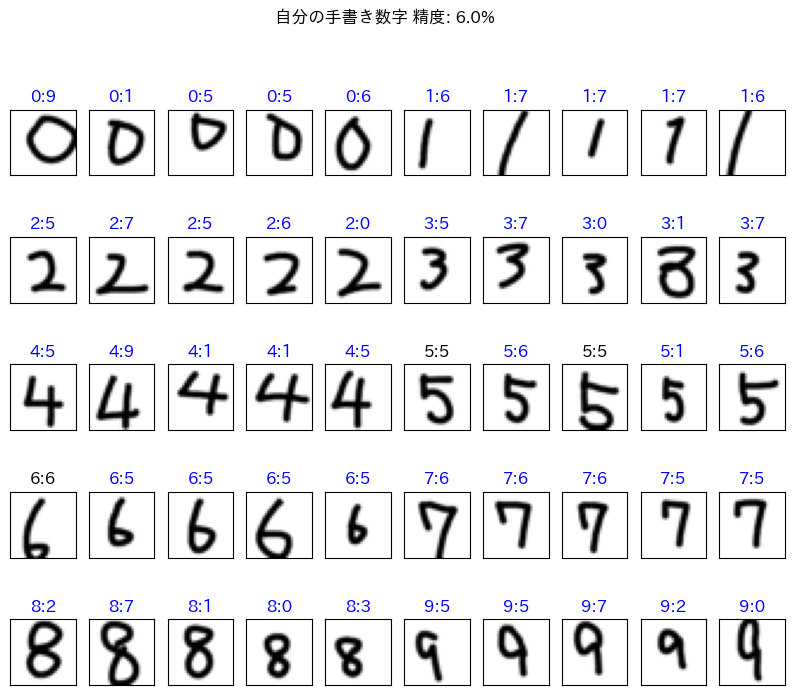

In [73]:
verify_set = datasets.ImageFolder(
    root = data_root_my_hand_digits,
    transform = transform
)

verify_loader = DataLoader(
    verify_set,
    batch_size = batch_size,
    shuffle = False
)

inputs, labels = next(iter(verify_loader))

n_input = inputs[0].numel()
n_output = 10
n_hidden = 128

net = Net2(
    n_input=n_input,
    n_output=n_output,
    n_hidden=n_hidden
) 
net.to(device) 
state_dict = torch.load(mnist_model_path, map_location=device) 
net.load_state_dict(state_dict)
net.eval()

plt.figure(figsize=(10, 8))

with torch.no_grad():
    for images, labels in verify_loader:
        break

    inputs = images.to(device)
    labels = labels.to(device)

    outputs = net(inputs)
    predicted = torch.max(outputs, 1)[1]

    total = 0
    correct = 0

    for i in range(images.size()[0]):
        total += 1
        ax = plt.subplot(5, 10, i + 1)

        image = images[i]
        label = labels[i].item()
        pred = predicted[i].item()

        if (pred == label):
            c = 'k'
            correct += 1
        else:
            c = 'b'

        image2 = (image + 1)/ 2

        plt.imshow(image2.reshape(28, 28),cmap='gray')
        ax.set_title(f'{label}:{pred}', c=c)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    accuracy = (correct / total) * 100
    plt.suptitle(f'自分の手書き数字 精度: {accuracy:.1f}%')